# Federico Andrucci
## email: federico.andrucci@studio.unibo.it
## matricola: 0001058695

testo esame

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from plot_clusters import plot_clusters
from max_diag import max_diag

# Variables
file_name = 'seeds_dataset.txt'
separator = '\t'
random_state = 42
target = 7

# Directives
%matplotlib inline
np.random.seed(random_state)

# 1. load the data and separate in X all the columns but the tlast one, in y the last column, then produce a pairplot of X and decide which pair of columns is most interesting for a 2d scatterplot, and produce the scatterplot

We will use numpy to load the dataset, then convert it to a Pandas DataFrame to operate on it. We also print the head of the dataframe to have a look on it.

In [3]:
text = np.loadtxt(file_name, delimiter=separator)
df = pd.DataFrame(text)
df.head()

,0,1,2,3,4,5,6,7
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0.0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0.0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0.0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0.0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0.0


We now separate the feature matrix from the target column

In [5]:
X = df.drop(target, axis=1)
y = df[target]

print(f"The feature matrix has {X.shape[0]} rows and {X.shape[1]} columns")

The feature matrix has 210 rows and 7 columns


In [6]:
print(f"There are {len(np.unique(y))} unique classes")

There are 3 unique classes


We will now produce a pairplot to look for possible interesting patterns.

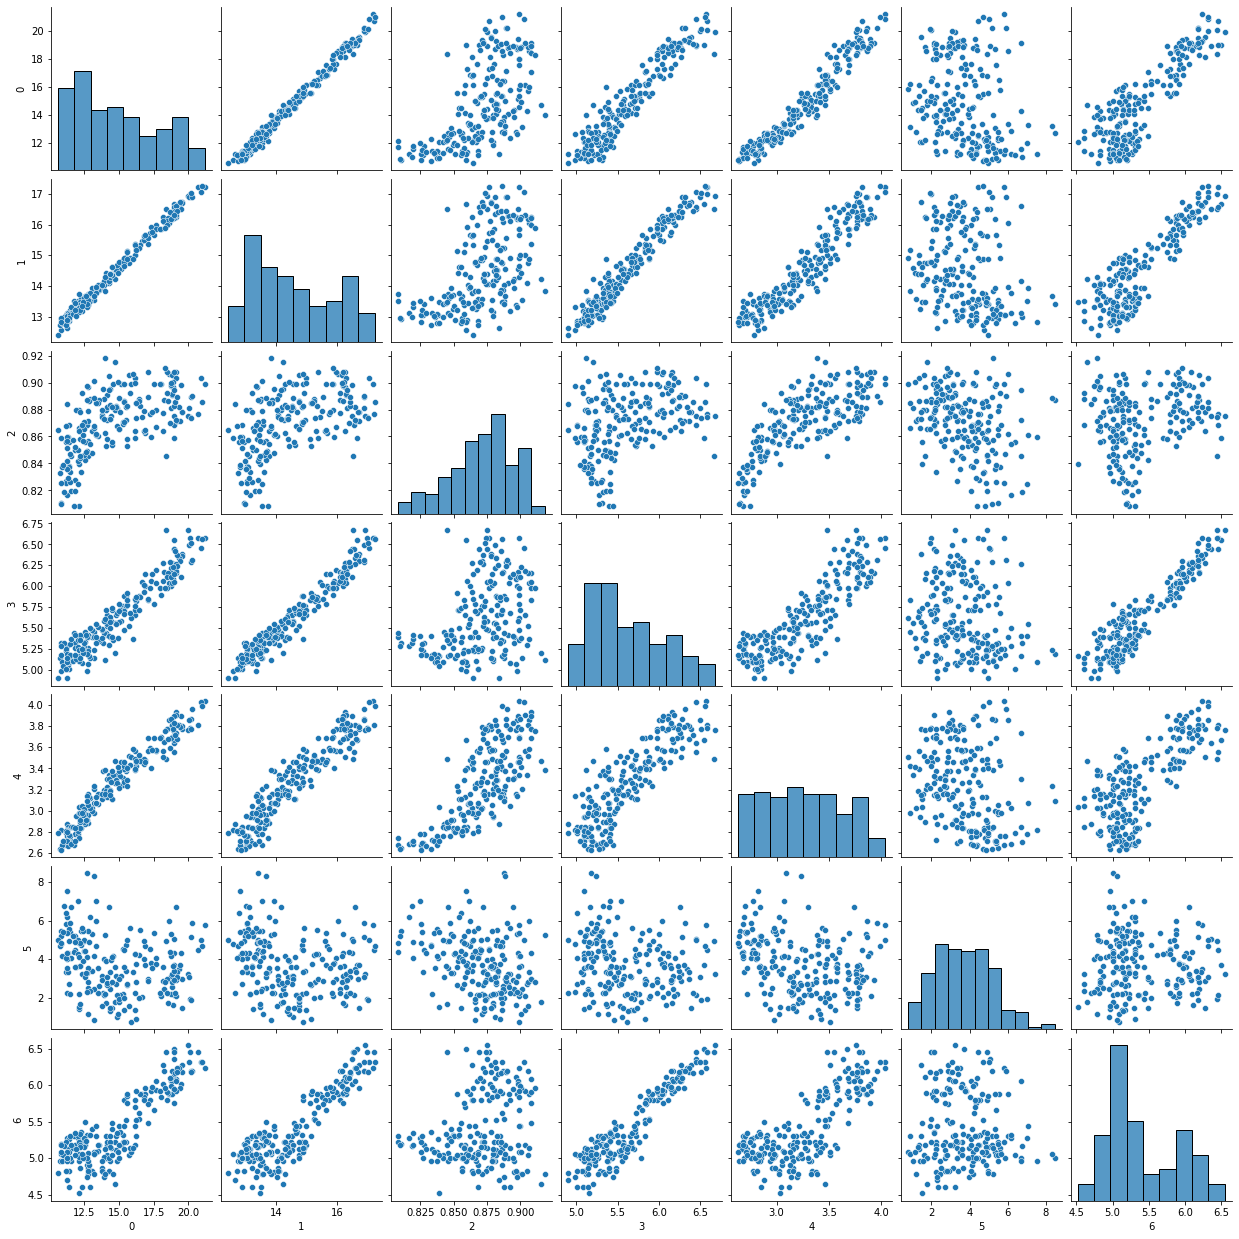

In [7]:
sns.pairplot(X)

Looking at the pairplots, we choose the columns 3 and 6 as they seem to create three distinct clusters, one for each of the classes that we have.

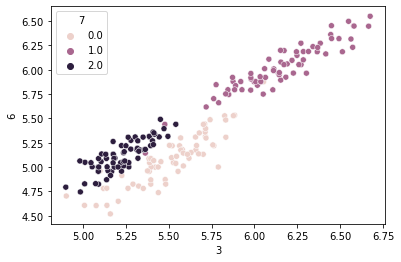

In [8]:
focus = [3, 6]
sns.scatterplot(x=focus[0], y=focus[1], data=df, hue=target)

# 2. Finda the best clustering scheme for X with a method of your choice, plot ssd and the global silhouette index for an appropriate range of parameters and show the chosen hyperparameters

In order to find a clustering scheme, we will use K-means with the elbow method, ranging from 2 to 10 clusters

In [10]:
# Range of possible clusters
k_range = range(2, 11)

# Distortion and Silhouette Score as measures
distortions = []
silhouette_scores = []

for i in k_range:
  km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=random_state)
  y_km = km.fit_predict(X)
  distortions.append(km.inertia_)
  silhouette_scores.append(silhouette_score(X, y_km))

Plot distortion and silhouette indexes

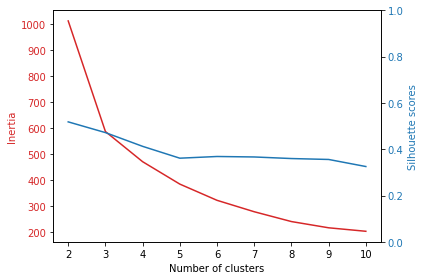

In [11]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Number of clusters')
ax1.set_ylabel('Inertia', color=color)
ax1.plot(k_range, distortions, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Silhouette scores', color=color)
ax2.plot(k_range, silhouette_scores, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(0, 1)

fig.tight_layout()
plt.show()

The silhouette scores plot tells us taht we obtain the best result with 2 clusters

In [12]:
silhouette_best_k = 2

# 3. Consider carefully the number of clusters, simple optimisation of the silhouette will not be enough, consider also the elbow plot and decide visually the best number of clusters

The elbow plot seems to suggest that there should be 3 clusters instead of 2. We will plot both clustering schemes and choose visually

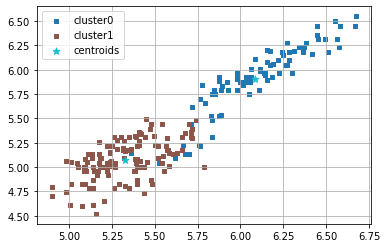

In [13]:
# First attempt with 2 clusters
km = KMeans(n_clusters=silhouette_best_k, init='k-means++', n_init=10, max_iter=300, tol=1e-04, random_state=random_state)

y_km = km.fit_predict(X)
plot_clusters(X.to_numpy(), y_km, dim=(focus[0], focus[1]), points=km.cluster_centers_)

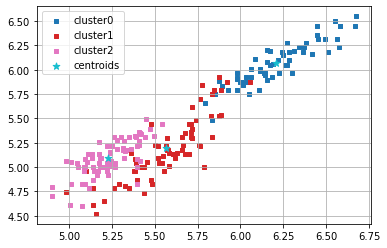

In [14]:
# Second attempt with 3 clusters
elbow_best_k = 3

km = KMeans(n_clusters=elbow_best_k, init='k-means++', n_init=10, max_iter=300, tol=1e-04, random_state=random_state)

y_km = km.fit_predict(X)
plot_clusters(X.to_numpy(), y_km, dim=(focus[0], focus[1]), points=km.cluster_centers_)

The clustering scheme with three clusters seems to be the best one of the two

In [15]:
best_k = 3

# 4. Fit the clustering scheme to y_km, then produce the confusion matrix comparing y and y_km with sklearn.metrics.confusion_matrix, the resulting confusion matrix must be "sorted" using the function max_diag provided below, producing the final confusion matrix cm_km

Let's start by fitting the clustering scheme wo y_km and producing the confusion matrix

In [16]:
km = KMeans(n_clusters=best_k, init='k-means++', n_init=10, max_iter=300, tol=1e-04, random_state=random_state)

y_km = km.fit_predict(X)
km.fit(X, y=y_km)

KMeans(n_clusters=3, random_state=42)

In [17]:
cm = confusion_matrix(y, y_km)
print(cm)

[[ 1 60  9]
 [60 10  0]
 [ 0  2 68]]


We now have a look at the function max_diag

In [18]:
help(max_diag)

Help on function max_diag in module max_diag:

max_diag(sq_arr)
    Given a square matrix produces another squared matrix with the same contents, 
    but the columns are re-orered in order to have the highest values in the main diagonal
    Parameter: sq_arr - a squared matrix
    Example:
    In [1]: import numpy as np
            max_diag(np.array([[1,10],[20,2]]))
    Out[1]: array([[10.,  1.],
                   [ 2., 20.]])
    This function is useful to reorder a confusion matrix when the two label vectors
    have different codings



In [19]:
cm_km = max_diag(cm)
print(cm_km)

[[60.  1.  9.]
 [10. 60.  0.]
 [ 2.  0. 68.]]
